<a href="https://colab.research.google.com/github/aso1901103/AI_tech2020/blob/master/wine_quality_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習を用いたデータ分析 


In [ ]:
# Jupyter notebook（python）を用いたデータ分析のデモ資料です
# ・pandasによるデータハンドリング
# ・matplotlibによる可視化
# ・機械学習による回帰分析（数値の予測）
# 　　・重回帰分析による予測
# の具体的な実行例です

In [ ]:
# ■分析に必要なモジュールをimportによりインポートします
# ・データ分析ライブラリで、データフレーム形式でデータを扱うことを可能にするpandas、
# ・数値処理計算をするnumpy、
# ・可視化（図示）をするmatplotlib、
# をimportしておきます

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# ■データの読み込みをします
# 白ワインと赤ワインの品質に関するデータを使用します
# 　・カリフォルニア大学アーバイン校 (UCI)が提供しているオープンデータを使用
# 　・https://archive.ics.uci.edu/ml/datasets/wine+quality

# データの読込みは、pandasのread_csvを使用します
# delimiterはデータの区切りを明示的に変えるときに使用します（今回は;）

# 白ワインのデータの読込み
df_w = pd.read_csv("winequality-white.csv", delimiter=';' )

# 赤ワインのデータの読込み
df_r = pd.read_csv("winequality-red.csv", delimiter=';' )

In [ ]:
# 読み込んだデータの列名の確認
df_w.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# 変数名を指定することで、変数の値が取り出せる
df_w['fixed acidity']

0       7.0
1       6.3
2       8.1
3       7.2
4       7.2
       ... 
4893    6.2
4894    6.6
4895    6.5
4896    5.5
4897    6.0
Name: fixed acidity, Length: 4898, dtype: float64

In [ ]:
# ■データセットの確認
# データセットの確認には、pandasが持っているメソッドである、head、info、describeなどを使用します

In [ ]:
# infoメソッド

df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# RangeIndex: 4898 entries, 0 to 4897
# ⇒ 列数が4898列（＝サンプル数）
# Data columns (total 12 columns):
# ⇒ 行数が12行（＝変数の数が12個）    
# fixed acidity           4898 non-null float64
# volatile acidity        4898 non-null float64
# citric acid             4898 non-null float64
# residual sugar          4898 non-null float64
# chlorides               4898 non-null float64
# free sulfur dioxide     4898 non-null float64
# total sulfur dioxide    4898 non-null float64
# density                 4898 non-null float64
# pH                      4898 non-null float64
# sulphates               4898 non-null float64
# alcohol                 4898 non-null float64
# quality                 4898 non-null int64
# ⇒ 品質(quality)と、品質と関係のある11個の変数がある
# ⇒ non-nullはnull（欠損）がないことを意味している
# ⇒ float64やint64は変数の型を示している

In [ ]:
# 赤ワインは、変数の数は12個で同じで、サンプル数が1599サンプルと白ワインより少ない

df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# headメソッド
# シェルのheadと同様に、先頭行n行の確認ができます
# データセットを加工している途中に中身の確認などによく使います
# デフォルトでは先頭5行が表示されます

df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# シェルと同様に、tail()もあります
df_w.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [ ]:
# describeメソッド
# 各変数の基本統計量の確認ができます
# countは数、meanは平均、stdは標準偏差、minとmaxは最小と最大、25%/50%/75%はパーセンタイルで全体の25％、50％、75％に位置する値

# 白ワインの各変数の基本統計量の確認
df_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# 赤ワインの各変数の基本統計量の確認
df_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



# ＜１変数ずつグラフ化して傾向を確認してみる＞

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

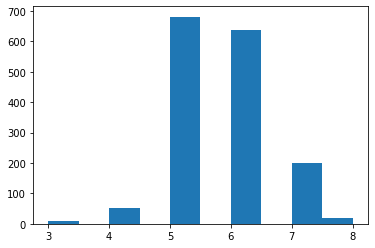

In [ ]:
# ■可視化によるデータ観察を実施していきます
# まずは、ヒストグラム（度数分布）を作成し、今回予測したい品質のデータの分布を確認します
# 各変数のデータの傾向の確認には、ヒストグラムを用います

# 図示の方法として、今回はmatplotlibのhistメソッドを使います
plt.hist(df_r["quality"])

In [ ]:
# ⇒ 赤ワインの品質のヒストグラムでは、品質5と6の値が一番多いのが分かる

Text(0, 0.5, 'Count')

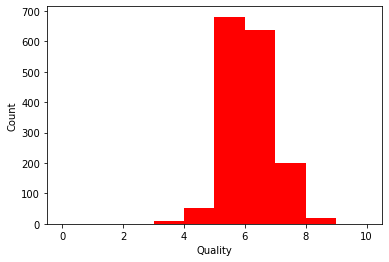

In [ ]:
# x軸を0～10にし、ヒストグラムの区切り幅を1にし、グラムの色を赤にする
# x軸のラベルとy軸のラベルを設定する
plt.hist(df_r["quality"], bins=10, range=(0, 10), color="red")
plt.xlabel("Quality")
plt.ylabel("Count")

In [ ]:
# 件数だけを集計するなら、pandasのvalue_countsで可能
df_r["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

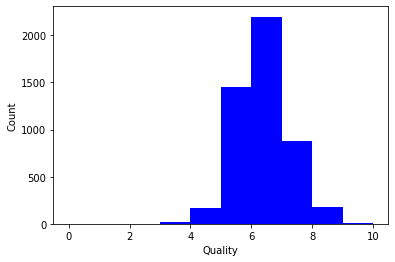

In [ ]:
# 白ワインでも同様のヒストグラムを書くと、品質6が一番多いのが分かる
plt.hist(df_w["quality"], bins=10, range=(0, 10), color="blue")
plt.xlabel("Quality")
plt.ylabel("Count")

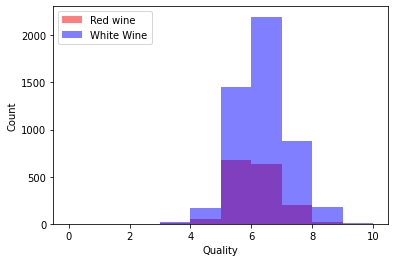

In [ ]:
# ２つのヒストグラムを重ねたグラムも作成可能
# 白ワインと赤ワインのヒストグラムを重ねたグラムを作成

plt.hist(df_r["quality"], bins=10, range=(0, 10), alpha=0.5, color="red", label="Red wine")
plt.hist(df_w["quality"], bins=10, range=(0, 10), alpha=0.5, color="blue", label="White Wine")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend(loc='upper left')

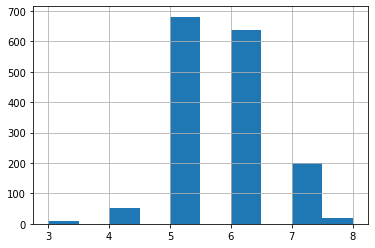

In [ ]:
# ヒストグラムの作成は、pandasのhist()メソッドでも作成可能
df_r["quality"].hist()

In [ ]:
# 白ワインについて、品質以外の変数のヒストグラムの確認を一度に実施
# 1つ目から4つ目までの変数を一度に確認してみる

# pandasを用いて、行は全て、列は1つ目から4つ目までのみ抽出
df_w.iloc[:, 0:4]

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.0,0.27,0.36,20.7
1,6.3,0.30,0.34,1.6
2,8.1,0.28,0.40,6.9
3,7.2,0.23,0.32,8.5
4,7.2,0.23,0.32,8.5
...,...,...,...,...
4893,6.2,0.21,0.29,1.6
4894,6.6,0.32,0.36,8.0
4895,6.5,0.24,0.19,1.2
4896,5.5,0.29,0.30,1.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa966ff3f50>,
      dtype=object)

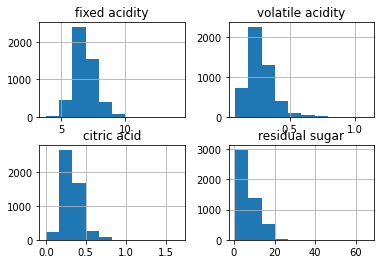

In [ ]:
# 一度に4つのヒストグラムを作成する
df_w.iloc[:,0:4].hist()

In [ ]:
# ⇒ fixed acidity、volatile acidity、citric acitは正規分布のような形をしている
# ⇒ residualは0-10が一番多く、徐々に減っている


# ＜散布図を描いて、変数間の関係性を確認する＞
## 品質と関係のある変数に当たりをつける

Text(0, 0.5, 'Quality')

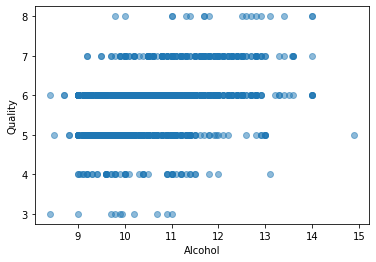

In [ ]:
# ■可視化によるデータ観察を実施していきます
# 次は、散布図を作成し、今回予測したい品質とその他の変数との関係性を確認します

# 図示の方法として、今回はmatplotlibのscatterメソッドを使います
# 引数の一つ目がx軸の値、二つ目がy軸の値
# alphaは点の透過度を調整するパラメータ
# アルコールと品質の散布図を作成します
plt.scatter(df_r["alcohol"], df_r["quality"], alpha=0.5)
plt.xlabel("Alcohol")
plt.ylabel("Quality")

In [ ]:
# ⇒ アルコール濃度が高くなると、徐々に品質も高くなるのが確認できる
# ⇒ アルコール濃度と品質には正の相関が確認できる

Text(0, 0.5, 'Quality')

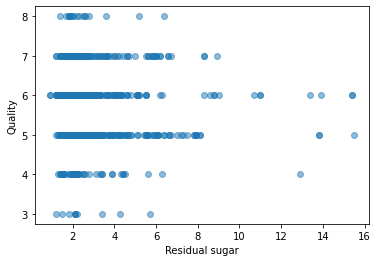

In [ ]:
# 次に、品質と残留糖分濃度の関係性を確認してみます
# x軸を残留糖分濃度、y軸を品質とした散布図を作成
# ⇒ 残留糖分濃度と品質には明確な相関関係は見られない

plt.scatter(df_r["residual sugar"], df_r["quality"], alpha=0.5)
plt.xlabel("Residual sugar")
plt.ylabel("Quality")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa966d33f10>,
      dtype=object)

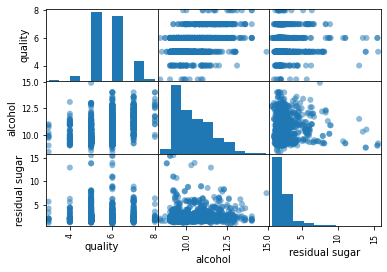

In [ ]:
# 一度に複数の組み合わせに関して、散布図を作成することも可能です
# pandasのscatter_matrixメソッドを使用（散布図の行列という意味）
# markerでプロットの形式を指定（今回は○）

pd.plotting.scatter_matrix(df_r[["quality", "alcohol", "residual sugar"]], marker="o")

In [ ]:
# ■　相関係数のヒートマップの作成により、一度に全ての変数の関係性を確認していきます
# 相関係数を用いることにより、数値的に関係性を把握する （相関行列の作成）
# （1～-1の値を取り、1だと正の相関、-1だと負の相関、0だと相関ない）

# 相関係数は、pandasのcorr()メソッドで算出可能です

cor_r = df_r.corr()
cor_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# ⇒ 対角線上は、自分に対する相関のため必ず1になる
# ⇒ qualityとalcoholの相関係数は0.476166である。散布図で確認したとおり、僅かに正の相関が見られる

([<matplotlib.axis.YTick at 0x7fa966a35490>,
 [Text(0, 0, 'fixed acidity'),
  Text(0, 0, 'volatile acidity'),
  Text(0, 0, 'citric acid'),
  Text(0, 0, 'residual sugar'),
  Text(0, 0, 'chlorides'),
  Text(0, 0, 'free sulfur dioxide'),
  Text(0, 0, 'total sulfur dioxide'),
  Text(0, 0, 'density'),
  Text(0, 0, 'pH'),
  Text(0, 0, 'sulphates'),
  Text(0, 0, 'alcohol'),
  Text(0, 0, 'quality')])

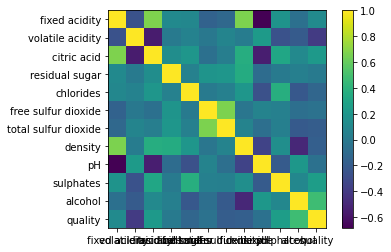

In [ ]:
# 次に、相関行列をヒートマップで可視化し、より直感的に理解しやすくします
# ヒートマップはmatplotlibのimshowメソッドを使用します

plt.imshow(cor_r, interpolation="none")
plt.colorbar()
plt.xticks(range(len(cor_r)), cor_r.columns)
plt.yticks(range(len(cor_r)), cor_r.columns)

In [ ]:
# ⇒ qualityとalcoholは黄緑色と、全体の中では高いのが分かる
# ⇒ fixed acidityとpHとが濃い青で、負の相関が見られる（相関係数:-0.68）

Text(0, 0.5, 'pH')

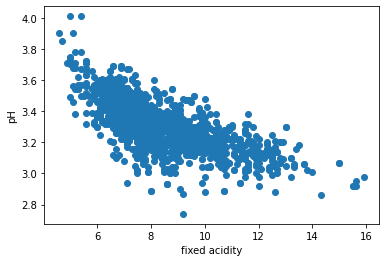

In [ ]:
# ちなみに、fixed acidityとpHの負の相関を散布図で確認してみると、、、
plt.scatter(df_r["fixed acidity"], df_r["pH"])
plt.xlabel("fixed acidity")
plt.ylabel("pH")

In [ ]:
# ⇒ fixed acidityが増えるに従いpHが減少しており、負の相関が確かに確認できます

## ===========================================================
## 　機械学習による予測の実施
## ===========================================================


In [ ]:
# ここからは、実際に機械学習を使った数値の予測を実施していきます
# 今回は、最も基本的な手法である重回帰分析を用います

### 重回帰分析による予測

In [ ]:
# まずは、重回帰分析による数値予測を実施していきます。
# pythonには、標準的な機械学習の手法や処理をメソッドとして含んだ便利なパッケージである「scikit-learn」が存在します

# scikit-learnをimportします
import sklearn

In [ ]:
# 機械学習によりモデルを作成する際、機械が学習してモデルを作成する用の学習用データと、
# 機械が学習用データで学習した精度を確認する評価用データを準備します
# 今回は、scikit-learnのtrain_test_splitメソッドを使って、これまで見てきたワインのデータを学習用データ7割、評価用データ3割に分割します

# まず、データを予測したい値である品質（目的変数）と、それ以外の変数（説明変数）に分割します
Xw = df_w.drop("quality", axis=1)
yw = df_w["quality"]
Xr = df_r.drop("quality", axis=1)
yr = df_r["quality"]
print(df_w.shape, Xw.shape, yw.shape)
print(df_r.shape, Xr.shape, yr.shape)

(4898, 12) (4898, 11) (4898,)
(1599, 12) (1599, 11) (1599,)


In [ ]:
# 学習用データと評価用データに分割します
from sklearn.model_selection import train_test_split

RATE_TEST = 0.3
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=RATE_TEST, random_state=1)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=RATE_TEST, random_state=1)
print("学習用", Xw_train.shape, "評価用", Xw_test.shape, "学習用", yw_train.shape, "評価用", yw_test.shape)
print("学習用", Xr_train.shape, "評価用", Xr_test.shape, "学習用", yr_train.shape, "評価用", yr_test.shape)

学習用 (3428, 11) 評価用 (1470, 11) 学習用 (3428,) 評価用 (1470,)
学習用 (1119, 11) 評価用 (480, 11) 学習用 (1119,) 評価用 (480,)


In [ ]:
# 各変数を平均0、標準偏差1に標準化する
# 各変数を同じ縮尺の空間で分析可能にする、各変数の重要度を比較しやすくするため

# scikit-learnのStandardScalerメソッドを使用
from sklearn.preprocessing import StandardScaler

sc_w = StandardScaler()
sc_w.fit(Xw_train)
Xw_train_stand = sc_w.transform(Xw_train)
Xw_test_stand = sc_w.transform(Xw_test)
yw_train_stand = (yw_train - yw_train.mean())/yw_train.std()
yw_test_stand = (yw_test - yw_train.mean())/yw_train.std()

sc_r = StandardScaler()
sc_r.fit(Xr_train)
Xr_train_stand = sc_r.transform(Xr_train)
Xr_test_stand = sc_r.transform(Xr_test)
yr_train_stand = (yr_train - yr_train.mean())/yr_train.std()
yr_test_stand= (yr_test - yr_train.mean())/yr_train.std()

mean and standard deviation with Standard scaler
-6.824568137369107e-16 : 1.0
-1.0674723130584936e-16 : 1.0


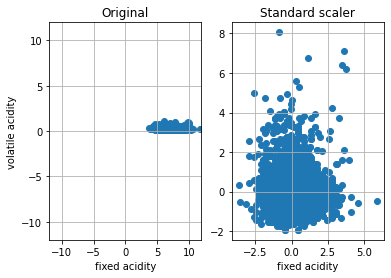

In [ ]:
# 標準化の確認
# 標準化後は平均0標準偏差１になっている

plt.subplot(1, 2, 1)
plt.scatter(Xw_train["fixed acidity"], Xw_train["volatile acidity"])
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")
plt.grid(True)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.scatter(Xw_train_stand[:,0], Xw_train_stand[:,1])
plt.xlabel("fixed acidity")
plt.grid(True)
plt.title("Standard scaler")

print("mean and standard deviation with Standard scaler")
print(Xw_train_stand[:,0].mean(), ":", Xw_train_stand[:,0].std())
print(Xw_train_stand[:,1].mean(), ":", Xw_train_stand[:,1].std())

In [ ]:
# ここから実際に重回帰を用いた予測をします

# 重回帰分析のパッケージをインポート
from sklearn.linear_model import LinearRegression

# 赤ワインに対して重回帰分析をする
lr_r = LinearRegression().fit(Xr_train_stand, yr_train_stand)

RMSE： 0.6439937591429782


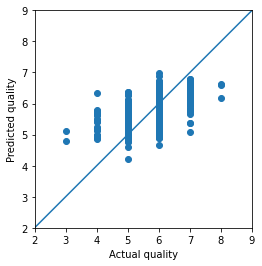

In [ ]:
# 実績と予測結果とを比較する

# 標準化した値から、実際の値へ戻す
yr_predict = lr_r.predict(Xr_test_stand) * yr_train.std() + yr_train.mean()

# 実績値（Actual quality）と予測値（Predicted quality）との散布図を作成し、精度を確認する
plt.scatter(yr_test, yr_predict)
plt.plot(range(2,10), range(2,10))
plt.xlim(2,9)
plt.ylim(2,9)
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")
plt.gca().set_aspect("equal", adjustable="box")

# 誤差の評価
rmse_r = np.sqrt(sum((yr_test - yr_predict) ** 2) / len(yr_test))
print("RMSE：", rmse_r)

In [ ]:
# 対角線の青い線が、実績=予測の線、対角線上に点がのると精度が高い
# 今回は、x軸の実績が増えるに従い、予測値も綺麗にではないが、若干増加する傾向を捉えている
# RMSEという誤差で0.64

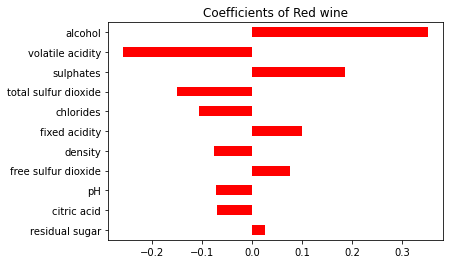

In [ ]:
# 品質への各変数の影響度を確認する

df_coef_r = pd.DataFrame({"Coef":lr_r.coef_, "Coef_abs":np.abs(lr_r.coef_)})
df_coef_r.index = Xr.columns
df_coef_r = df_coef_r.sort_values(by="Coef_abs")
df_coef_r["Coef"].plot(kind="barh", title="Coefficients of Red wine", color="red")

In [ ]:
# ⇒ 0を中心に、正に相関のある変数は右側のプラス側へ、負に相関がある変数は左のマイナス側へ
# ⇒ 今回、白ワインの品質が高い場合は、alcohol濃度が高く、
# ⇒ total sulfur dioxide(総亜硫酸濃度)とvolatile acidity(酢酸濃度)は低い方がよい、となっている

In [ ]:
lr_w = LinearRegression().fit(Xw_train_stand, yw_train_stand)

RMSE： 0.7338465684364135


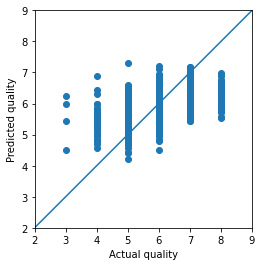

In [ ]:
# 実績と予測結果とを比較する

# 標準化した値から、実際の値へ戻す
yw_predict = lr_w.predict(Xw_test_stand) * yw_train.std() + yw_train.mean()

# 実績値（Actual quality）と予測値（Predicted quality）との散布図を作成し、精度を確認する
plt.scatter(yw_test, yw_predict)
plt.plot(range(2,10), range(2,10))
plt.xlim(2,9)
plt.ylim(2,9)
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")
plt.gca().set_aspect("equal", adjustable="box")

# 誤差の評価
rmse_w = np.sqrt(sum((yw_test - yw_predict) ** 2) / len(yw_test))
print("RMSE：", rmse_w)